In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
#using tensorflow backend
import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.layers import LeakyReLU

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print("Training data shape:", train_x.shape, train_y.shape)
print("Testing data shape:", test_x.shape, test_y.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [ ]:
#find the unique numbers from the trian labels
classes = np.unique(train_y)
nClasses = len(classes)
print("The total no of outputs: ", nClasses)
print("Output Classes: ", classes)

The total no of outputs:  10
Output Classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground truth: 5')

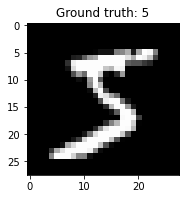

In [ ]:
#display the image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap = 'gray')
plt.title("Ground truth: {}".format(train_y[0]))

Text(0.5, 1.0, 'ground truth: 7')

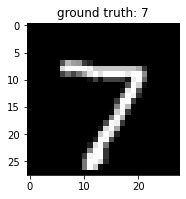

In [ ]:
#display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap = 'gray')
plt.title("ground truth: {}".format(test_y[0]))

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#change the labels from catgoricals to one_hot encoding
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [ ]:
#display the change for category label using one_hot encoding
print("Original label:", train_y[0])
print("After conversion to one_hot: ", train_y_one_hot[0])

Original label: 5
After conversion to one_hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, valid_x, train_label, valid_label = train_test_split(train_x, train_y_one_hot, test_size = 0.2, random_state = 13)

In [ ]:
print(train_x.shape, valid_x.shape, valid_label.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (12000, 10)


In [ ]:
batch_size = 64
epochs = 3
num_classes = 10
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
m_model.add(LeakyReLU(alpha = 0.1))
m_model.add(MaxPooling2D((2, 2), padding = 'same'))
m_model.add(Flatten())
m_model.add(Dense(128, activation = 'linear'))
m_model.add(LeakyReLU(alpha = 0.1))
m_model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
m_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
m_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-

In [ ]:
m_train = m_model.fit(train_x, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_x, valid_label))
test_eval = m_model.evaluate(test_x, test_y_one_hot, verbose = 0)
print("Test accuracy:", test_eval[1])
print("Test loss: ", test_eval[0])

Epoch 1/3
750/750 [==============================] - 50s 66ms/step - loss: 3.1299 - accuracy: 0.9068 - val_loss: 0.3255 - val_accuracy: 0.9506
Epoch 2/3
750/750 [==============================] - 50s 67ms/step - loss: 0.1894 - accuracy: 0.9623 - val_loss: 0.2800 - val_accuracy: 0.9528
Epoch 3/3
750/750 [==============================] - 50s 66ms/step - loss: 0.1409 - accuracy: 0.9714 - val_loss: 0.2442 - val_accuracy: 0.9610
Test accuracy: 0.9627000093460083
Test loss:  0.22670771181583405


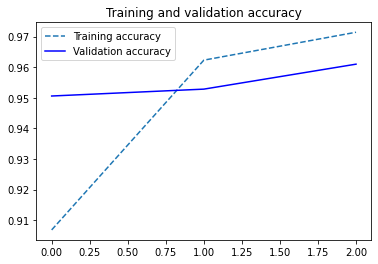

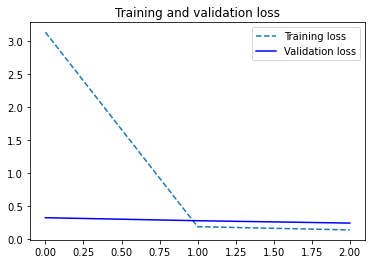

In [ ]:
accuracy = m_train.history['accuracy']
val_accuracy = m_train.history['val_accuracy']
loss = m_train.history['loss']
val_loss = m_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '--', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
predicted_classes = m_model.predict(test_x)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_y.shape

313/313 [==============================] - 4s 12ms/step


((10000,), (10000,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.96      0.97       980
     Class 1       0.99      0.97      0.98      1135
     Class 2       0.93      0.98      0.96      1032
     Class 3       0.97      0.96      0.96      1010
     Class 4       0.97      0.97      0.97       982
     Class 5       0.95      0.98      0.96       892
     Class 6       0.98      0.96      0.97       958
     Class 7       0.97      0.95      0.96      1028
     Class 8       0.92      0.95      0.94       974
     Class 9       0.96      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

